<a href="https://colab.research.google.com/github/fjpAntunes/mean-field-tools/blob/develop/experiments/deep_bsde_quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
!git clone -b develop https://github.com/fjpAntunes/mean-field-tools.git

Cloning into 'mean-field-tools'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 201 (delta 110), reused 155 (delta 72), pack-reused 0
Receiving objects: 100% (201/201), 70.48 KiB | 11.75 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
%cd mean-field-tools/

/content/mean-field-tools


In [3]:
from mean_field_tools.deep_bsde.forward_backward_sde import Filtration, BackwardSDE
import torch

In [4]:
%pdb

Automatic pdb calling has been turned ON


100%|██████████| 50001/50001 [08:44<00:00, 95.32it/s]


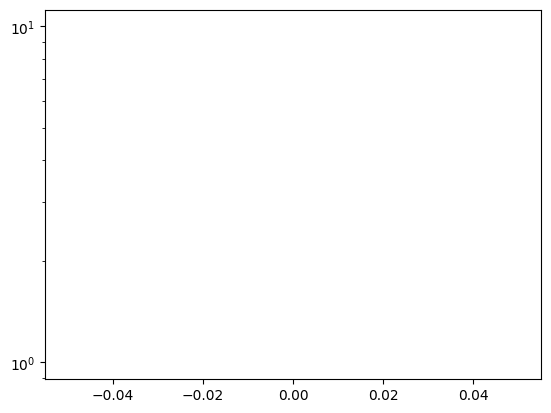

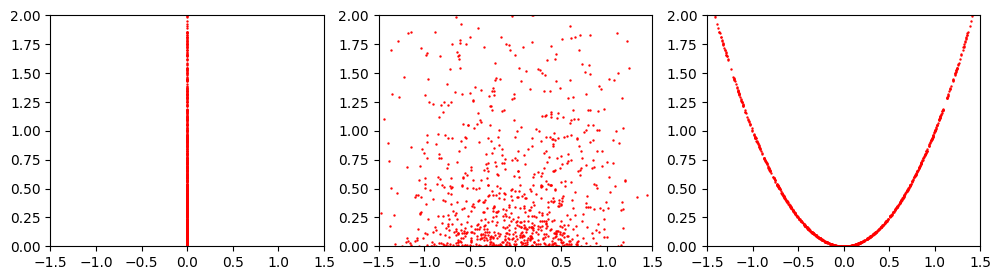

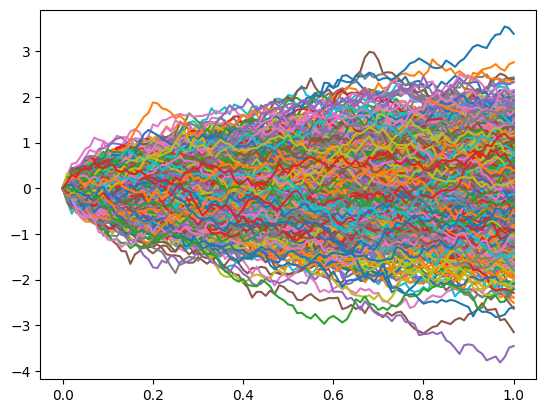

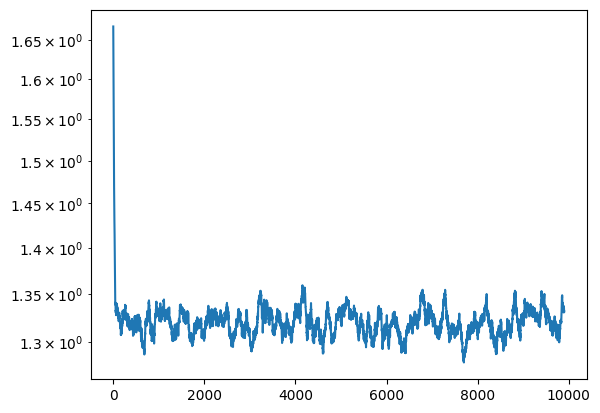

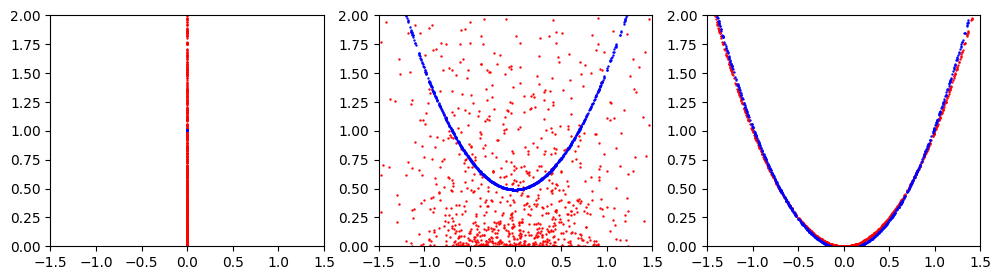

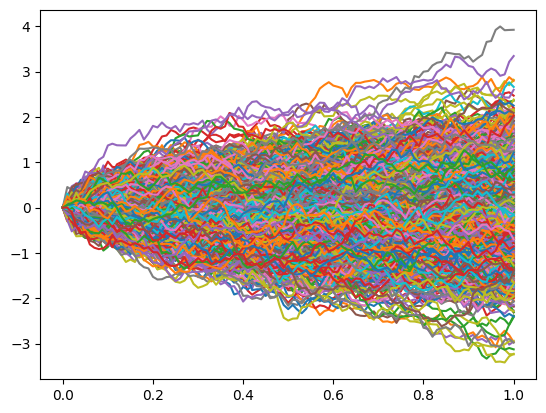

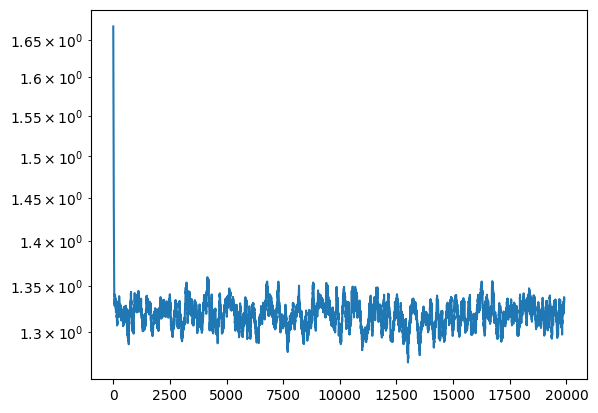

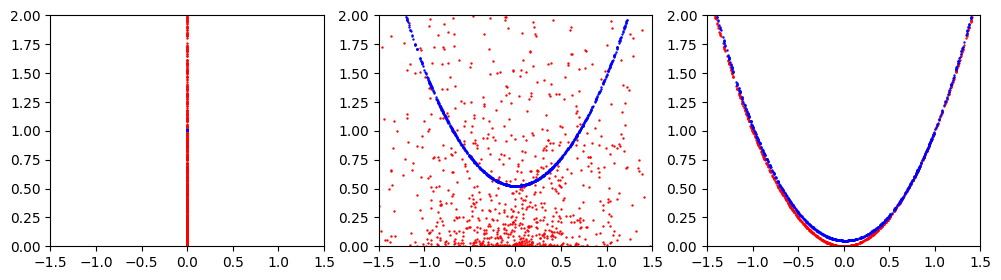

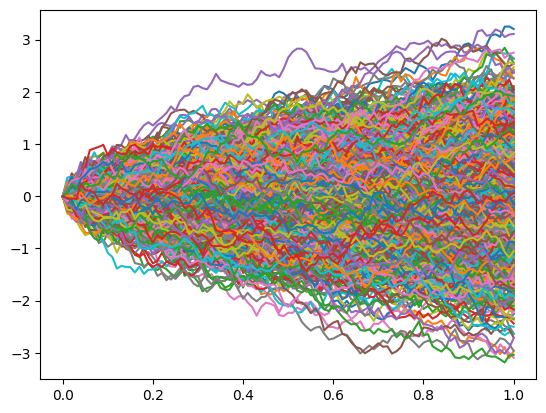

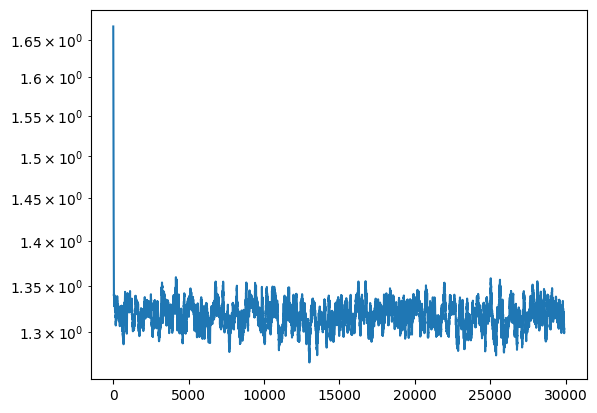

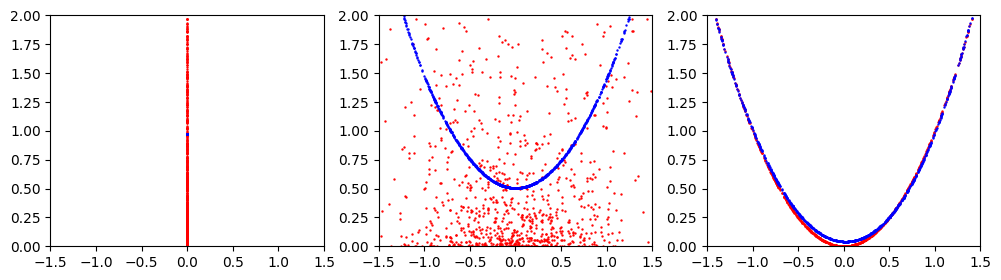

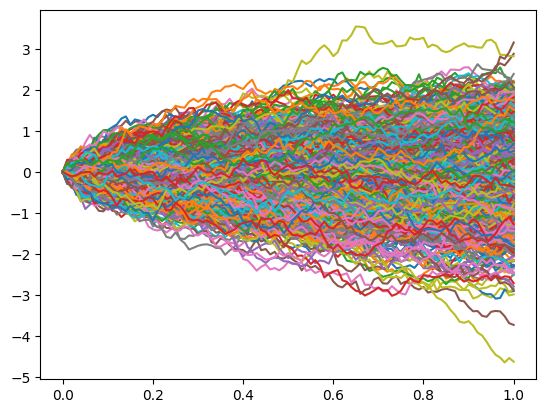

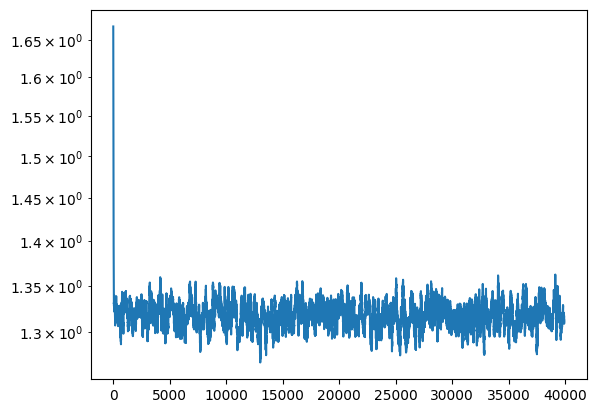

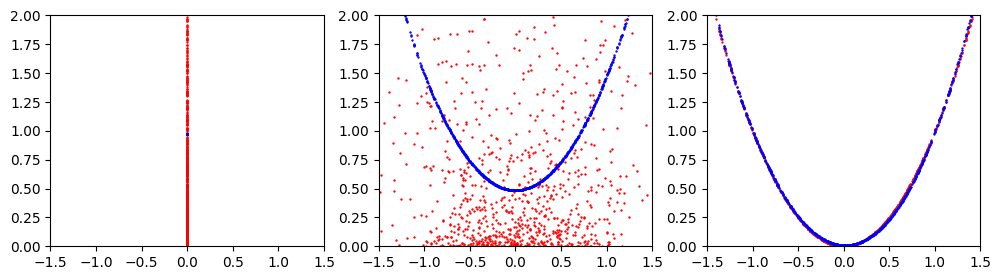

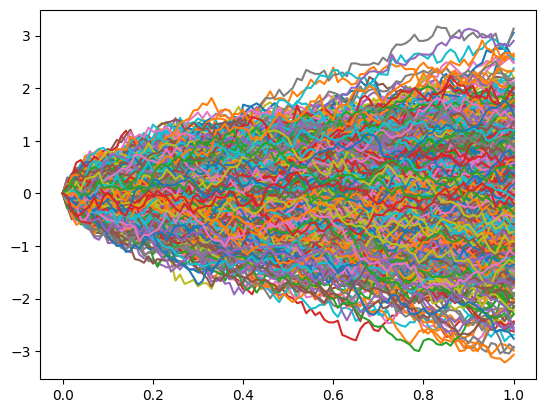

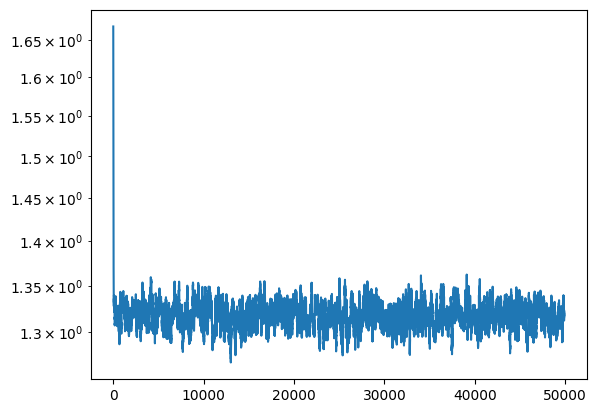

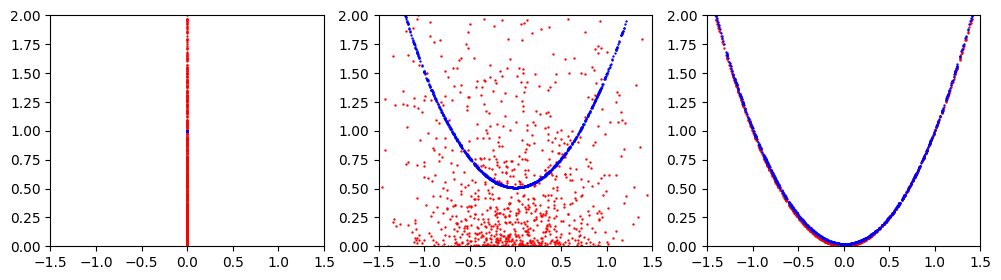

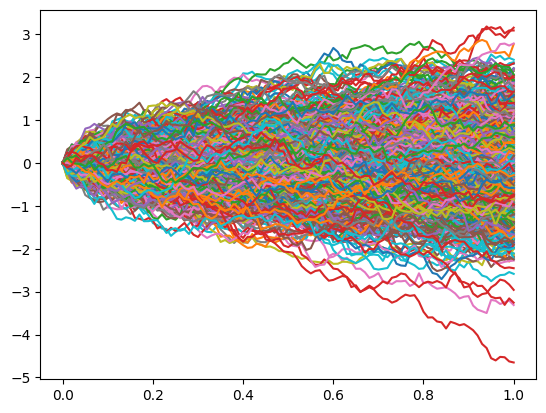

In [6]:
TIME_DOMAIN = torch.linspace(0, 1, 101)
NUMBER_OF_PATHS = 100_000
SPATIAL_DIMENSIONS = 1

TERMINAL_CONDITION = lambda x: x**2

filtration = Filtration(SPATIAL_DIMENSIONS, TIME_DOMAIN, NUMBER_OF_PATHS)
filtration.generate_paths()

bsde = BackwardSDE(
    spatial_dimensions=SPATIAL_DIMENSIONS,
    time_domain=TIME_DOMAIN,
    terminal_condition_function=TERMINAL_CONDITION,
    filtration=filtration,
)

device = "cuda" if torch.cuda.is_available() else "cpu"
bsde.initialize_approximator(nn_args = {'device': device})

bsde.solve(
    approximator_args={
        "batch_size": 1024,
        "number_of_iterations": 50_001,
        "steps_between_plots": 10000,
        "plotting": True,
        #"save_figures": True
    }
)